# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
%pip install -q ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [7]:
# Jawab Soal 1
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [8]:
# Jawab Soal 2
df['workclass'].fillna(value=df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(value=df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(value=df['native-country'].mode()[0], inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [9]:
# Jawab Soal 2
df.info()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].replace ('?', 'others')

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'others' 'Sel

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

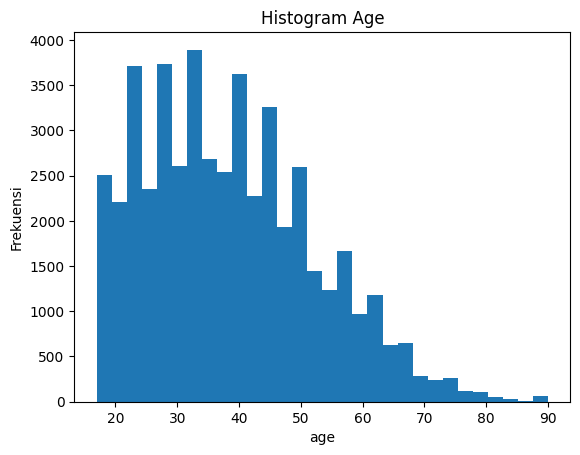

In [10]:
# Jawab 1.1 - Histrogram
num_cols = ['age']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title ("Histogram Age")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()


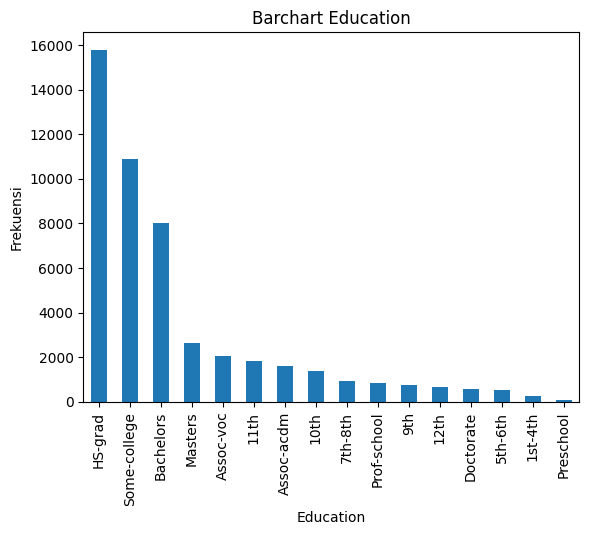

In [11]:
# Jawab 1.2 - Barchart
df['education'].value_counts().plot(kind='bar')
plt.title("Barchart Education")
plt.xlabel("Education")
plt.ylabel("Frekuensi")
plt.show()

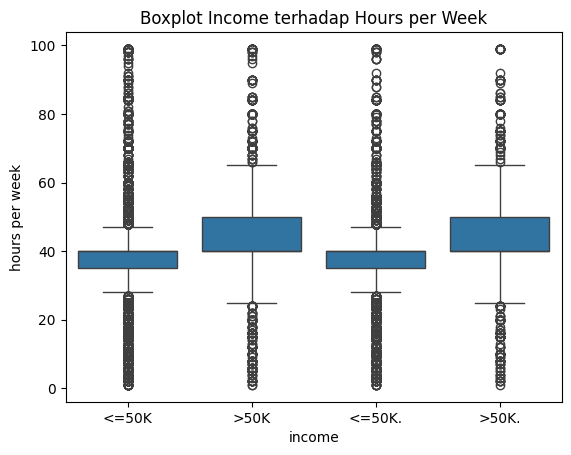

In [12]:
# Jawab 1.3 - Boxplot
plt.figure()
sns.boxplot(x=df['income'], y=df['hours-per-week'], data=df, )
plt.title("Boxplot Income terhadap Hours per Week")
plt.xlabel("income")
plt.ylabel("hours per week")
plt.show()

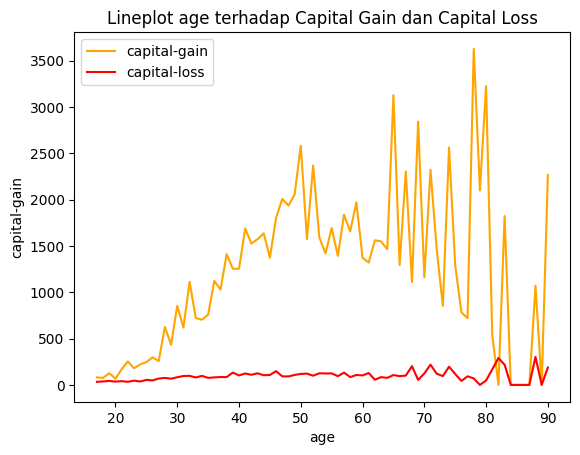

In [13]:
# Jawab 1.4 - Lineplot
plt.figure()
age_group = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()
sns.lineplot(x='age', y='capital-gain', data=age_group, label= 'capital-gain', color='orange')
sns.lineplot(x='age', y='capital-loss', data=age_group, label= 'capital-loss', color='red')
plt.title("Lineplot age terhadap Capital Gain dan Capital Loss")
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [14]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

***1. Fenomena apa yang terjadi pada distribusi data age***

    - distribusi pada data age cenderung memiliki bentuk positif yakni right-skewed hal ini berarti pada kolom age didonimasi oleh umur produktif sedangkan umur tua sebagai minoritas, sehingga dapat disimpulkan bahwa para pekerja didominasi oleh para produktif ketimbang yang tua

***2. Jika terdapat data yng hilang pada variabel age strategi apa yang dapat diterapkan***

    - Lebih baik menggunakan strategi pengisian median secara median dikarenakan memiliki bentuk sebaran positif atau right skewed sehingga hak ini akan berpengaruh pada hasil outliers

***3. Berapa jumlah outlier pada setip kategori income terhadap hours per week? kategori apa yang paling banyak memiliki outlier***

    - outlier paling banyak dihasilkan oleh pendapatan diatas 50k, karena jika berpenghasilan diatas 50K memiliki rata rata jam kerja diatas 40 jam per minggu

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [19]:
# Jawab Soal 1
from sklearn.preprocessing import LabelEncoder
df_slice = df[['sex','income']]
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
df_slice.head()

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

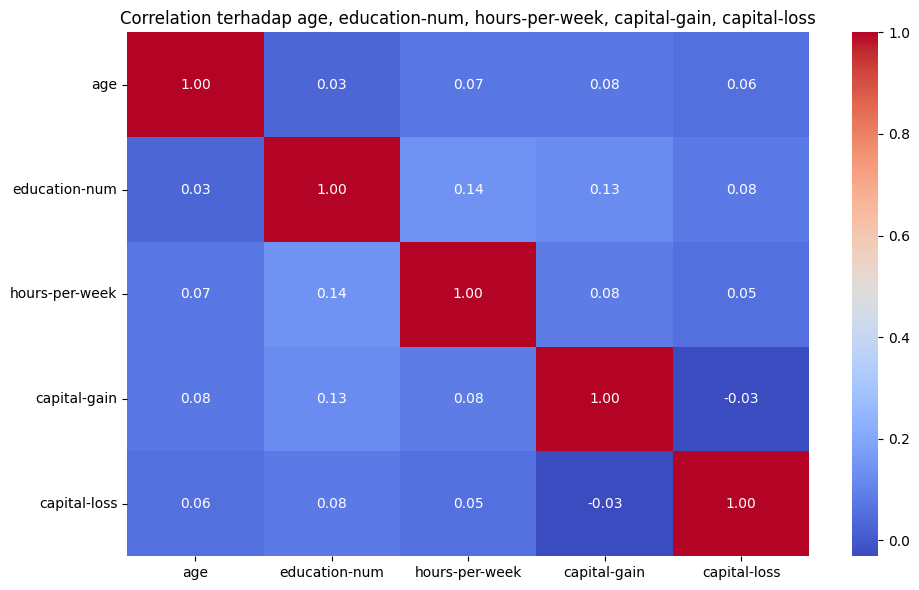

In [20]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
num_only = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']]
corr = num_only.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation terhadap age, education-num, hours-per-week, capital-gain, capital-loss")
plt.tight_layout()
plt.show()

In [21]:
# Hasil analisis jelaskan pada cell ini

***Interpretasi Analisis Korelasi:***

    1. 'income_encoded' memiliki korelasi positif terkuat dengan 'education-num' (~0,3), yang menunjukkan bahwa tingkat pendidikan yang lebih tinggi berkaitan dengan pendapatan yang lebih tinggi.

    2. 'capital-gain' juga menunjukkan korelasi positif sedang dengan 'income_encoded' (~0,2), yang menunjukkan bahwa capital gain berkontribusi pada pendapatan yang lebih tinggi.

    3. 'age' dan 'hours-per-week' memiliki korelasi positif yang lebih lemah dengan 'income_encoded', yang menyiratkan usia yang lebih tua dan jam kerja yang lebih banyak agak berkaitan dengan pendapatan yang lebih tinggi.

    4. 'capital-loss' memiliki korelasi yang sangat lemah dengan 'income_encoded', yang menunjukkan dampak minimal.
    
    5. Di antara fitur-fitur tersebut, 'education-num' dan 'hours-per-week' memiliki korelasi positif sedang (~0,15), yang menunjukkan bahwa pendidikan yang lebih tinggi dapat menyebabkan jam kerja yang lebih panjang.

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [22]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

2025-09-19 10:30:29.637597: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-19 10:30:29.697955: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-19 10:30:29.698849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-19 10:30:31.127486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


11490434/11490434 [==============================] - 9s 1us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


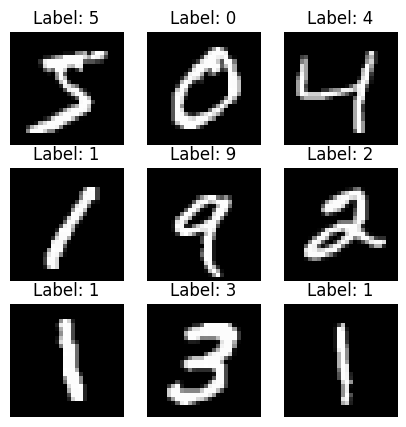

In [23]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

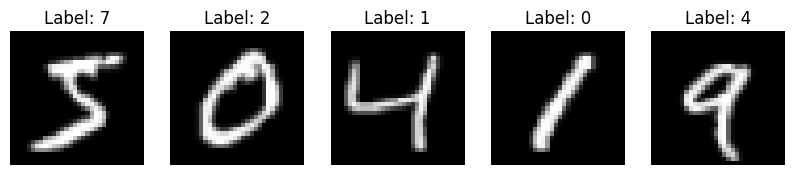

In [ ]:
# Jawab Soal 1
import cv2

x_resize = np.zeros((X_train.shape[0], 32, 32))
for i in range(X_test.shape[0]):
    x_resize[i] = cv2.resize(X_train[i], (32, 32))

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_resize[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

min:  0.0
max:  1.0


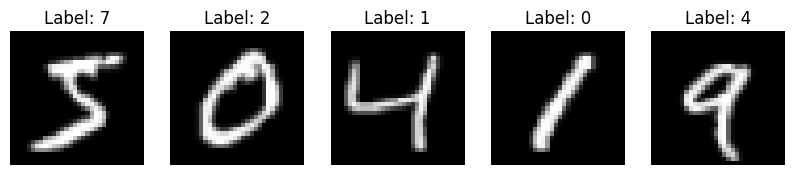

In [27]:
# Jawab Soal 2
x_resize = np.zeros((X_train.shape[0], 32, 32))
for i in range(X_test.shape[0]):
    x_resize[i] = cv2.resize(X_train[i], (32, 32))
x_resize_norm = x_resize.astype('float32') / 255.0

print('min: ', x_resize_norm.min())
print('max: ', x_resize_norm.max())

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_resize_norm[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [30]:
# Jawab Soal 3
import numpy as np
x_resize_flat = np.zeros((X_train.shape[0], 32*32))
for i in range(x_resize_norm.shape[0]):
    x_resize_flat[i] = x_resize_norm[i].flatten()

print('flattened ', x_resize_flat.shape)
print('min: ', x_resize_norm.min())
print('max: ', x_resize_norm.max())
print(x_resize_flat[0][:10])

flattened  (60000, 1024)
min:  0.0
max:  1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
